# Main Code


In [0]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [0]:
df=pd.read_csv('Consumer Behavior.csv')

In [330]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase Amount
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Predicting Purchase Amount

## Preprocessing

In [331]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase Amount                 int64
dtype: object

In [0]:
stay_dict={'2':2, '4+':4, '3':3, '1':1, '0':0}
age_dict={'0-17':0, '55+':55, '26-35':26, '46-50':46, '51-55':51, '36-45':36, '18-25':18}

In [0]:
#converting objects into int

le_gend=LabelEncoder()

le_city=LabelEncoder()

df = df.fillna(0) #replacing nan values with 0

df['Gender']=le_gend.fit_transform(df['Gender'])

df['City_Category']=le_city.fit_transform(df['City_Category'])

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map(stay_dict)

df['Age']=df['Age'].map(age_dict)

In [334]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase Amount
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55,16,2,4,0,8,0.0,0.0,7969


In [0]:
#Dividing into X and y

X=df.drop(['User_ID','Purchase Amount'],axis=1)

y=df['Purchase Amount']


#adding 3 new features

X['Age_Prod1']=X.apply(lambda x:x['Age']*x['Product_Category_1'],axis=1) 

X['Prod2_Prod1_Prod3']=X.apply(lambda x:x['Product_Category_2']*x['Product_Category_3']*x['Product_Category_1'],axis=1)

X['Prod2_Prod1']=X.apply(lambda x:x['Product_Category_2']*x['Product_Category_1'],axis=1)

X['Product_ID'] = df['Product_ID'].factorize()[0]

#splitting X and y into train and validation

X_train,X_validation,y_train,y_validation=train_test_split(X,y,test_size=0.27,random_state=1234)

## Random Forest

In [0]:
#parameters are tuned using Validation Error
rf=RandomForestRegressor(n_estimators=30,verbose=3,max_depth=90,min_samples_leaf=120,criterion='mse')
rf.fit(X_train,y_train)

In [341]:
pred1 = rf.predict(X_validation)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished


In [343]:
r2_score(y_validation,pred1) # validation r square

0.7019104508645861

In [344]:
rf.score(X_train,y_train) # train r square

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished


0.7065975041921814

## Decision Tree

In [345]:
#parameters are tuned using Validation Error
dt=DecisionTreeRegressor(max_depth=70,max_leaf_nodes = 2000,min_samples_leaf=90)
dt.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=70, max_features=None,
           max_leaf_nodes=2000, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=90,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
pred2 = dt.predict(X_validation)

In [348]:
r2_score(y_validation,pred2) # r square of validation 

0.7022401380775009

In [349]:
dt.score(X_train,y_train) # r square of train

0.7112422900511657

## Cobaining both

In [351]:
pred = (pred1+pred2)/2
r2_score(y_validation,pred) #final r2_score

0.7047783361004718

# Clusteing Consumers

In [0]:
Data = pd.read_csv("Consumer Behavior.csv")

combaining all rows of a particular user into one row and creating new data

In [0]:
user_list = list(set(Data.User_ID)) #set of users

In [0]:
g = []
a = []
o = []
c = []
sic = []
ms = []
pc1 = []
pc2 = []
pc3 = []
PA = []
for i in user_list:
    t = Data[Data.User_ID==i]
    g.append(t.Gender.values[0])
    a.append(t.Age.values[0])
    o.append(t.Occupation.values[0])
    c.append(t.City_Category.values[0])
    sic.append(t.Stay_In_Current_City_Years.values[0])
    ms.append(t.Marital_Status.values[0])
    pc1.append(t.Product_Category_1.mean())
    pc2.append(t.Product_Category_2.mean())
    pc3.append(t.Product_Category_3.mean())
    PA.append(t['Purchase Amount'].sum())
    

In [0]:
Data2 = pd.DataFrame()
Data2['user_ID'] = user_list
Data2['Gender'] = g
Data2['Age'] = a
Data2['Occupation'] = o
Data2['City_Category'] = c
Data2['Stay_In_Current_City_Years'] = sic
Data2['Marital_Status'] = ms
Data2['Product_Category_1'] = pc1
Data2['Product_Category_2'] = pc2
Data2['Product_Category_3'] = pc3
Data2['PA'] = PA

In [0]:
#preprocessing data2
Data2 = Data2.fillna(0)
Data2.Stay_In_Current_City_Years = Data2.Stay_In_Current_City_Years.replace('4+',5)

Data2.Gender = pd.factorize(Data2.Gender)[0]
Data2.Age = Data2.Age.replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[1,2,3,4,5,6,7])
Data2.City_Category = pd.factorize(Data2.City_Category)[0]

In [357]:
Data2.head()

,user_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,PA
0,1000001,0,1,10,0,2,0,5.676471,6.285714,10.571429,333481
1,1000002,1,7,16,1,5,0,4.394737,9.981481,13.807692,810353
2,1000003,1,3,15,0,3,0,3.206897,5.086957,11.384615,341635
3,1000004,1,5,7,2,2,1,1.000000,8.500000,14.111111,205987
4,1000005,1,3,20,0,1,1,6.216981,11.068966,12.937500,821001


In [0]:
Data2 = Data2.drop(labels=['user_ID'],axis=1)

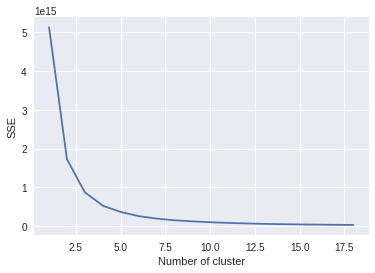

In [360]:
#Finding the optimal number of clusters
sse = {}
for k in range(1, 19):
    kmeans = KMeans(n_clusters=k, max_iter=500).fit(Data2)
    Data2["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [0]:
kmeans = KMeans(n_clusters=4, max_iter=500).fit(Data2) #from elbow method picked k = 4
Data2["clusters"] = kmeans.labels_

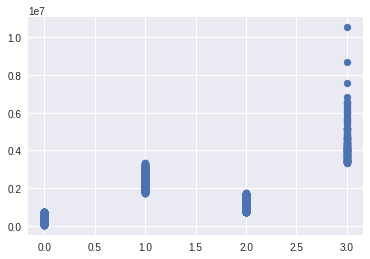

In [385]:
plt.scatter(Data2.clusters,Data2.PA)


In [383]:
Data2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,PA,clusters
0,0,1,10,0,2,0,5.676471,6.285714,10.571429,333481,2
1,1,7,16,1,5,0,4.394737,9.981481,13.807692,810353,2
2,1,3,15,0,3,0,3.206897,5.086957,11.384615,341635,2
3,1,5,7,2,2,1,1.000000,8.500000,14.111111,205987,2
4,1,3,20,0,1,1,6.216981,11.068966,12.937500,821001,2


# TEST FUNCTION

In [0]:
x='Consumer Behavior.csv'

In [0]:
def test(x):
    stay_dict={'2':2, '4+':4, '3':3, '1':1, '0':0}
    age_dict={'0-17':0, '55+':55, '26-35':26, '46-50':46, '51-55':51, '36-45':36, '18-25':18}
    
    df=pd.read_csv('Consumer Behavior.csv')
    
    le_gend=LabelEncoder()
    le_city=LabelEncoder()
    
    df['Gender']=le_gend.fit_transform(df['Gender'])
    df['City_Category']=le_city.fit_transform(df['City_Category'])
    df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map(stay_dict)
    df['Age']=df['Age'].map(age_dict)
    df['Product_ID'] = df['Product_ID'].factorize()[0]
    
    X=df.drop(['User_ID','Purchase Amount'],axis=1)
    y=df['Purchase Amount']
    
    X.fillna(value=0.01,inplace=True)
    X['Age_Prod1']=X.apply(lambda x:x['Age']*x['Product_Category_1'],axis=1)
    X['Prod2_Prod1_Prod3']=X.apply(lambda x:x['Product_Category_2']*x['Product_Category_3']*x['Product_Category_1'],axis=1)
    X['Prod2_Prod1']=X.apply(lambda x:x['Product_Category_2']*x['Product_Category_1'],axis=1)
    
 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.27,random_state=38)
    
    
    rf=RandomForestRegressor(n_estimators=30,verbose=3,max_depth=90,min_samples_leaf=120,criterion='mse')
    rf.fit(X_train,y_train)
    pred1 = rf.predict(X_test)
    
    dt=DecisionTreeRegressor(max_depth=70,max_leaf_nodes = 2000,min_samples_leaf=90)
    dt.fit(X_train,y_train)
    pred2 = dt.predict(X_test)
   
    pred_final=(pred1+pred2)/2
    
    print("R2:{}".format(r2_score(y_test,pred_final)))
    print("\n RMSE:{}".format(np.sqrt(mean_squared_error(y_test,pred_final))))
    

In [400]:
test(x)

building tree 1 of 30


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 30


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   46.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished


R2:0.7028213458003576

 RMSE:2714.4902872384846
